
# VGG 19 pre-trained model for U-TAD 2024 Task recognition cats and dogs

## 1. Imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow import data as tf_data
import keras

seed = 1
keras.utils.set_random_seed(seed)


## 2. Read in the training data

Here you set the image size, an essential parameter for the rest of the modelling



In [2]:
image_size = (224, 224)

# when working with 20_000 files for training this
# will lead to exactly 160 mini-batches per epoch
batch_size = 125

# https://keras.io/api/data_loading/image/#imagedatasetfromdirectory-function

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    #"PetImages",
    "/kaggle/input/u-tad-dogs-vs-cats-2024/train/train",
    validation_split=0.2,
    subset="both",
    seed=seed,
    image_size=image_size,
    batch_size=batch_size,
    labels="inferred",
    label_mode="categorical",
)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Using 5000 files for validation.



## 3. Load the VGG19 pre trained model

We explore this pre-trained model by asking for its summary. It is just another model, as any one we could write ourselves, but already specified -and trained!


In [3]:
# Cargar el modelo VGG19 y los pesos desde la ruta local
vgg = keras.applications.VGG19(weights='/kaggle/input/vgg19weights/vgg19_weights_tf_dim_ordering_tf_kernels.h5', 
            include_top=True, input_shape=(224, 224, 3))

# Congelar las capas de VGG19 para que no se entrenen de nuevo
for layer in vgg.layers:
    layer.trainable = False


## 4. Set the non-trainable layers and the last -or classification- layer specific for this problem

Note we keep the original VGG-16 initial -input- layer. Thus, we need to setup the image size -as we did before


In [ ]:
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten  

# Conectar una capa de Flatten y capas adicionales al final
inp = vgg.input
x = vgg.layers[-2].output  
x = Flatten(name="new_flatten")(x)

x = Dense(256, activation='relu', name="dense_256")(x)
x = Dropout(0.5, name="dropout_1")(x)
x = Dense(128, activation='relu', name="dense_128")(x)
x = Dropout(0.5, name="dropout_2")(x)

# Capa de salida para clasificación binaria (perro/gato)
out = Dense(2, activation='softmax', name="output")(x)

# Crear el modelo final con las capas adicionales
model_new = Model(inputs=inp, outputs=out)

In [5]:
model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,31

 Total params: 140,652,226 (536.55 MB)

 Trainable params: 1,081,986 (4.13 MB)

 Non-trainable params: 139,570,240 (532.42 MB)

## 5. Train (fit)

In [6]:
epochs = 12

history = model_new.fit(train_ds,
                    validation_data = val_ds,
                    epochs = epochs)

Epoch 1/12


I0000 00:00:1731664823.279253    8991 service.cc:145] XLA service 0x783518004bc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731664823.279306    8991 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1731664849.223882    8991 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


160/160 ━━━━━━━━━━━━━━━━━━━━ 80s 329ms/step - accuracy: 0.9110 - loss: 0.3533 - val_accuracy: 0.9732 - val_loss: 0.0744
Epoch 2/12
160/160 ━━━━━━━━━━━━━━━━━━━━ 52s 325ms/step - accuracy: 0.9605 - loss: 0.1047 - val_accuracy: 0.9708 - val_loss: 0.0726
Epoch 3/12
160/160 ━━━━━━━━━━━━━━━━━━━━ 52s 325ms/step - accuracy: 0.9693 - loss: 0.0801 - val_accuracy: 0.9724 - val_loss: 0.0714
Epoch 4/12
160/160 ━━━━━━━━━━━━━━━━━━━━ 52s 325ms/step - accuracy: 0.9726 - loss: 0.0723 - val_accuracy: 0.9720 - val_loss: 0.0679
Epoch 5/12
160/160 ━━━━━━━━━━━━━━━━━━━━ 82s 324ms/step - accuracy: 0.9754 - loss: 0.0677 - val_accuracy: 0.9708 - val_loss: 0.0688
Epoch 6/12
160/160 ━━━━━━━━━━━━━━━━━━━━ 52s 325ms/step - accuracy: 0.9776 - loss: 0.0613 - val_accuracy: 0.9716 - val_loss: 0.0680
Epoch 7/12
160/160 ━━━━━━━━━━━━━━━━━━━━ 52s 324ms/step - accuracy: 0.9778 - loss: 0.0593 - val_accuracy: 0.9726 - val_loss: 0.0655
Epoch 8/12
160/160 ━━━━━━━━━━━━━━━━━━━━ 52s 325ms/step - accuracy: 0.9798 - loss: 0.0555 - val

Visualización de capas intermedias


Imagen seleccionada: 820.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Visualizando activaciones para la capa 1


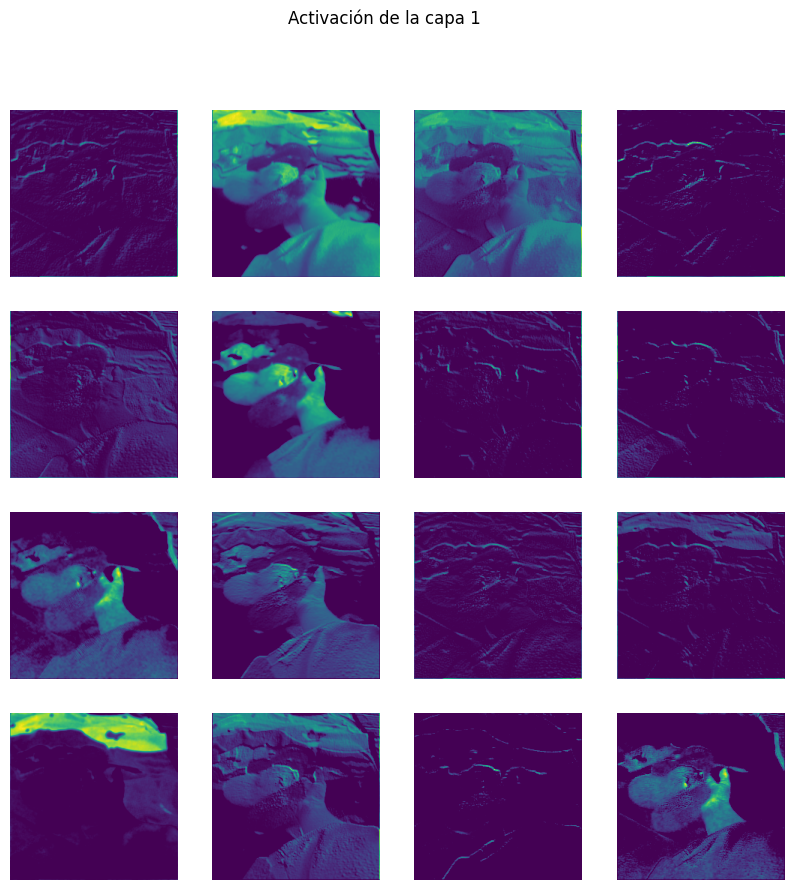

Visualizando activaciones para la capa 4


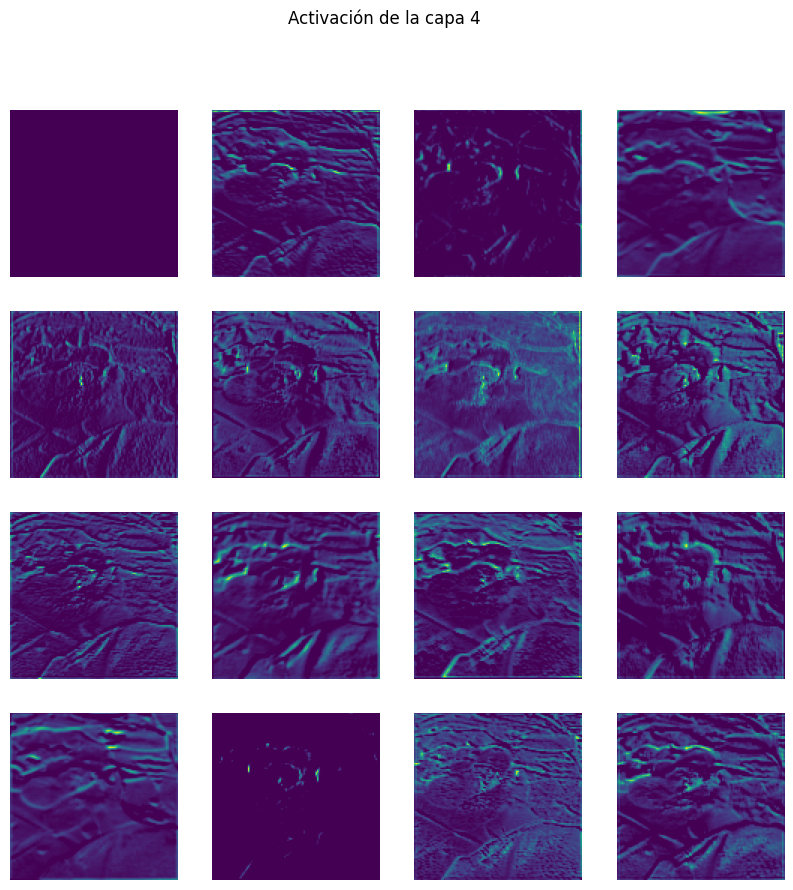

Visualizando activaciones para la capa 7


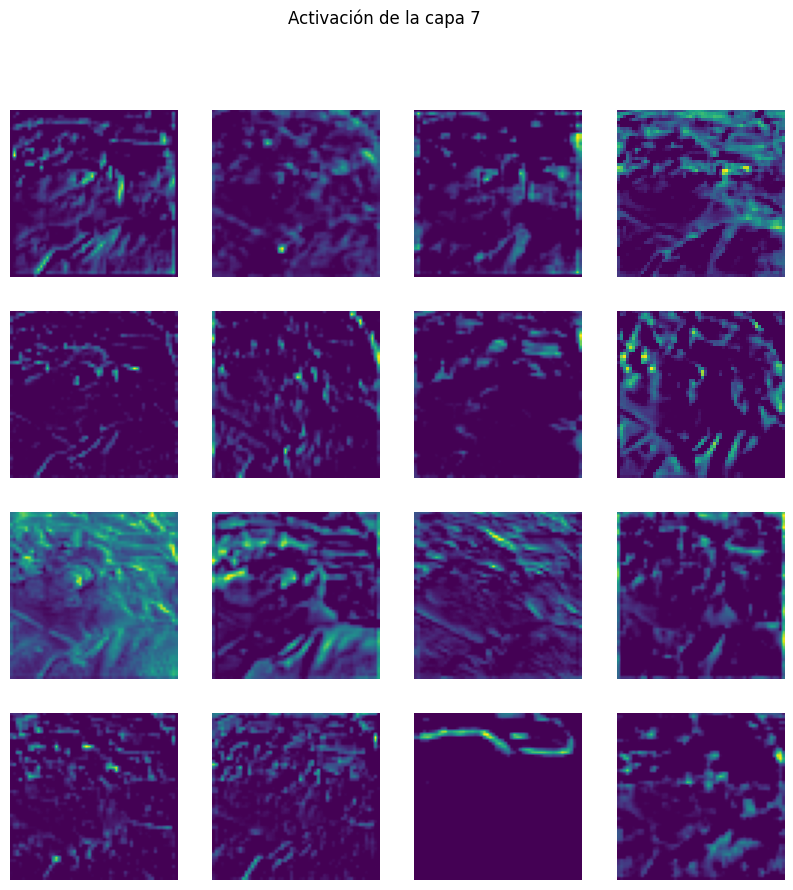

Visualizando activaciones para la capa 12


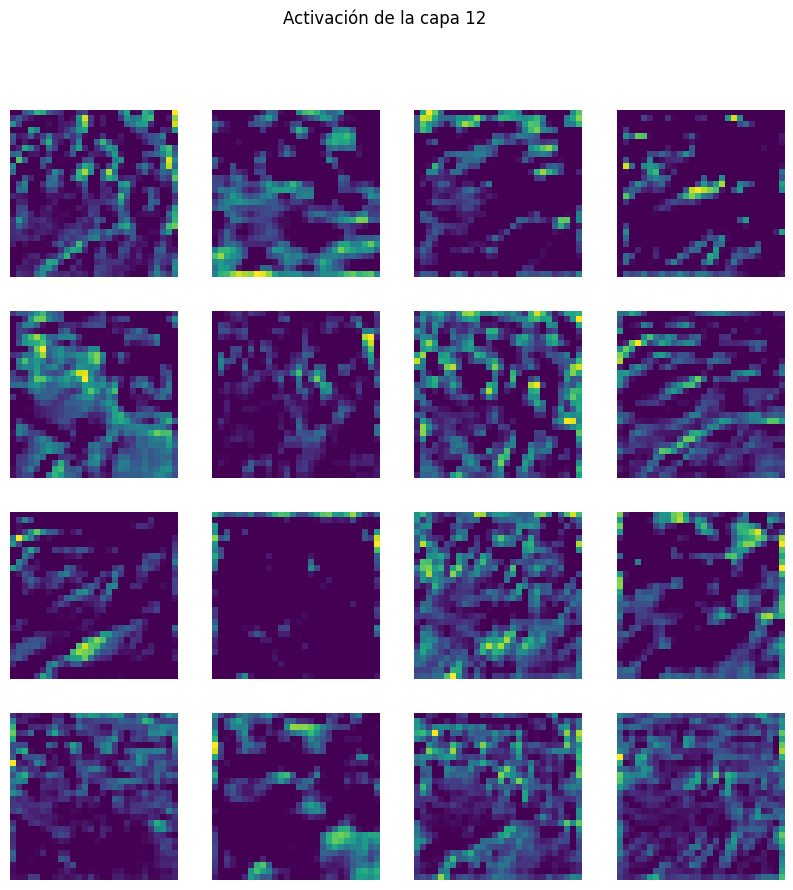

Visualizando activaciones para la capa 16


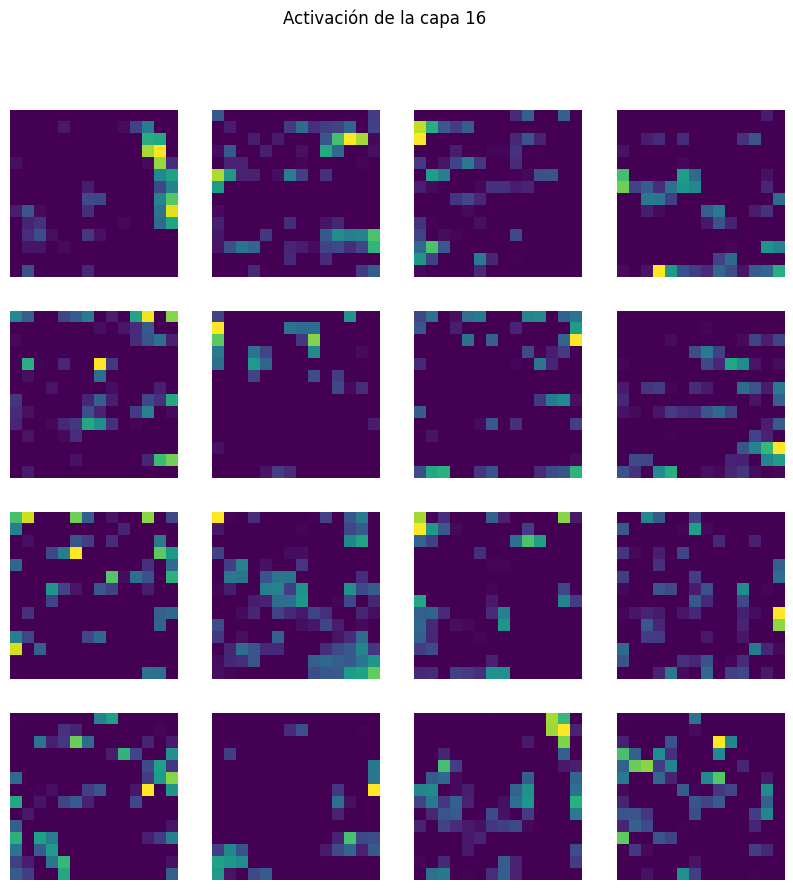

Visualizando activaciones para la capa 20


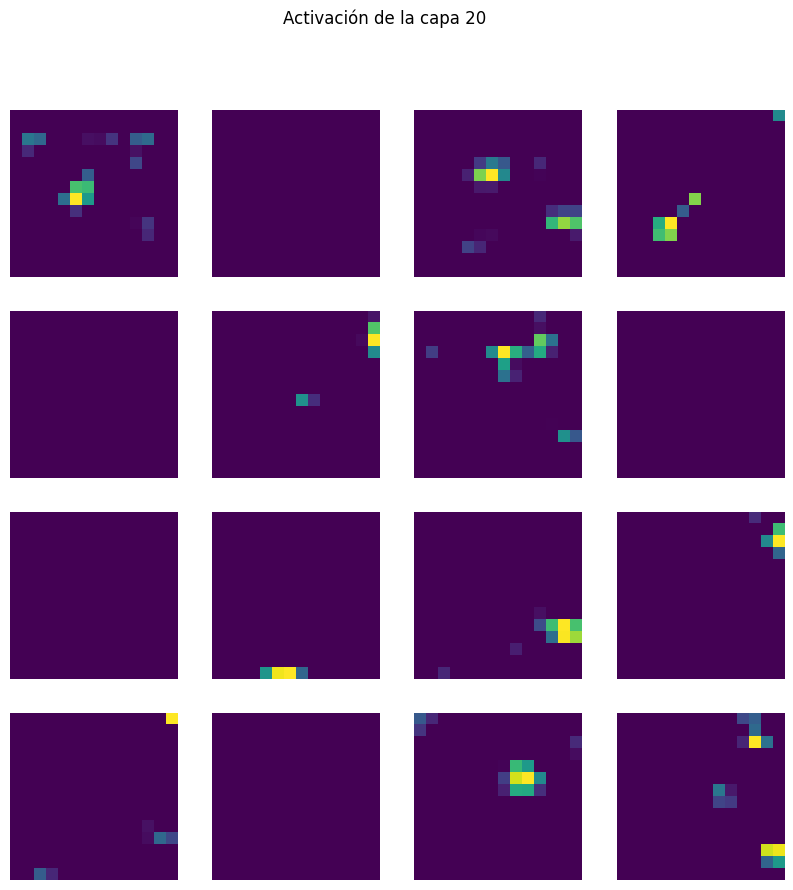

In [ ]:
import random
from tensorflow.keras.models import Model
from tensorflow import expand_dims
from tensorflow.keras.utils import load_img, img_to_array
import tensorflow as tf

# Definir los índices de capas a visualizar en el modelo VGG19
layer_indices = [1, 4, 7, 12, 16, 20]  
layer_outputs = [model_new.layers[i].output for i in layer_indices]
visualization_model = Model(inputs=model_new.inputs, outputs=layer_outputs)

# Selección aleatoria de una imagen de prueba
test_directory = "/kaggle/input/u-tad-dogs-vs-cats-2024/test/test"
test_images = os.listdir(test_directory)
random_image = random.choice(test_images)
print(f"Imagen seleccionada: {random_image}")

# Cargar y preparar la imagen para el modelo
image_path = os.path.join(test_directory, random_image)
image = load_img(image_path, target_size=image_size)
image_array = img_to_array(image)
image_array = expand_dims(image_array, axis=0)

# Generar las activaciones de las capas seleccionadas
activations = visualization_model.predict(image_array)

# Función para normalizar y visualizar activaciones
def normalize_activation(activation):
    min_val = np.min(activation)
    max_val = np.max(activation)
    return (activation - min_val) / (max_val - min_val + 1e-5)

# Visualización de las activaciones para cada capa seleccionada
grid_size = 4
for i, activation_map in enumerate(activations):
    print(f"Visualizando activaciones para la capa {layer_indices[i]}")
    normalized_activation = normalize_activation(activation_map) 
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(10, 10))
    axes = axes.flatten()
    for j, ax in enumerate(axes[:normalized_activation.shape[-1]]):
        ax.imshow(normalized_activation[0, :, :, j], cmap='viridis')
        ax.axis("off")
    plt.suptitle(f"Activación de la capa {layer_indices[i]}")
    plt.show()


## 6. Visualization of the training

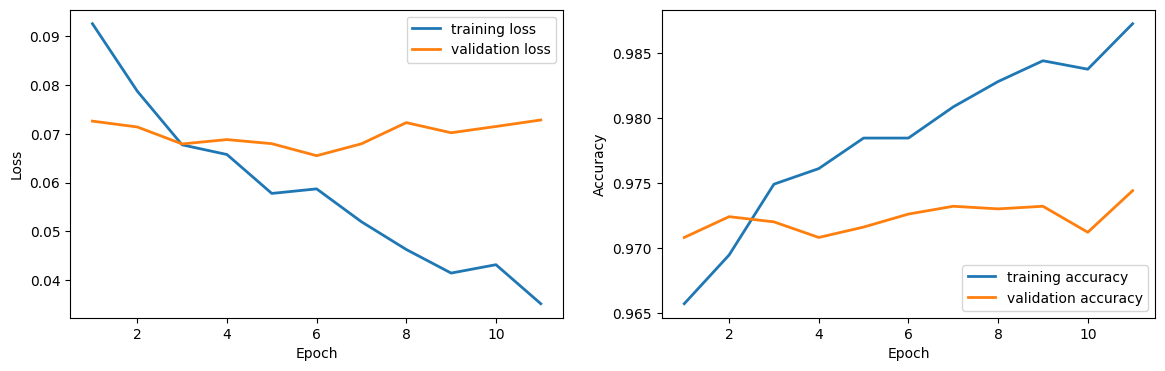

In [8]:
logs = pd.DataFrame(history.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[1:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[1:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[1:,"accuracy"], lw=2, label='training accuracy')
plt.plot(logs.loc[1:,"val_accuracy"], lw=2, label='validation accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.show()


## 7. Create predictions for all test images

In [9]:
folder_path = "/kaggle/input/u-tad-dogs-vs-cats-2024/test/test"

In [ ]:
import os  
import pandas as pd
import keras

# Define la ruta a la carpeta de prueba
folder_path = "/kaggle/input/u-tad-dogs-vs-cats-2024/test/test"

# Define el tamaño de la imagen, si no está definido en otro lugar
image_size = (224, 224) 

# Define el umbral de discriminación: por debajo de 0.5 es un gato, por encima es un perro
discrimination_threshold = 0.5  
predictions_dict = {}

# Recorre todas las imágenes en el directorio de prueba
for img in os.listdir(folder_path):
    img_path = os.path.join(folder_path, img)
    
    # Obtiene el nombre del archivo sin extensión para usarlo como ID
    file_name = img.split('/')[-1]
    file_no_extension = file_name.split('.')[0]
    
    # Carga y preprocesa la imagen
    img = keras.utils.load_img(img_path, target_size=image_size)
    img_array = keras.utils.img_to_array(img)
    img_array = keras.ops.expand_dims(img_array, 0)
    
    # Realiza la predicción
    predictions = model_new.predict(img_array, verbose=None)
    score = predictions[0][1]
    label = int(score > discrimination_threshold)  # Convierte a 1 o 0 según el umbral
    
    # Guarda la predicción en el diccionario con el ID de la imagen
    predictions_dict[int(file_no_extension)] = label

# Convierte las predicciones en un DataFrame de pandas
predictions_df = pd.DataFrame(predictions_dict.items(), columns=["id", "label"])

# Ordena el DataFrame por el ID de la imagen
predictions_df = predictions_df.sort_values(by='id', ascending=True)

# Guarda las predicciones en un archivo CSV
predictions_df.to_csv('predictions.csv', index=False)

print("Predicciones guardadas en predictions.csv")


Predicciones guardadas en predictions.csv


## 8. Save predictions to a competition submission file

In [11]:
submission = pd.DataFrame(predictions_dict.items(), columns=["id", "label"]).sort_values(by='id', ascending=True)
submission.to_csv('submission.csv',index=False)

# print numbers of each class label
submission["label"].value_counts()

label
0    621
1    446
Name: count, dtype: int64

In [12]:
submission

,id,label
292,1,0
1031,2,1
863,3,0
830,4,0
78,5,0
...,...,...
712,1063,1
525,1064,1
951,1065,0
470,1066,1


**Submit by clicking on the Submit button at the right**